# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [11]:
str(ames.Alley.dtype)

'object'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fe8fe80>,
      dtype=object)

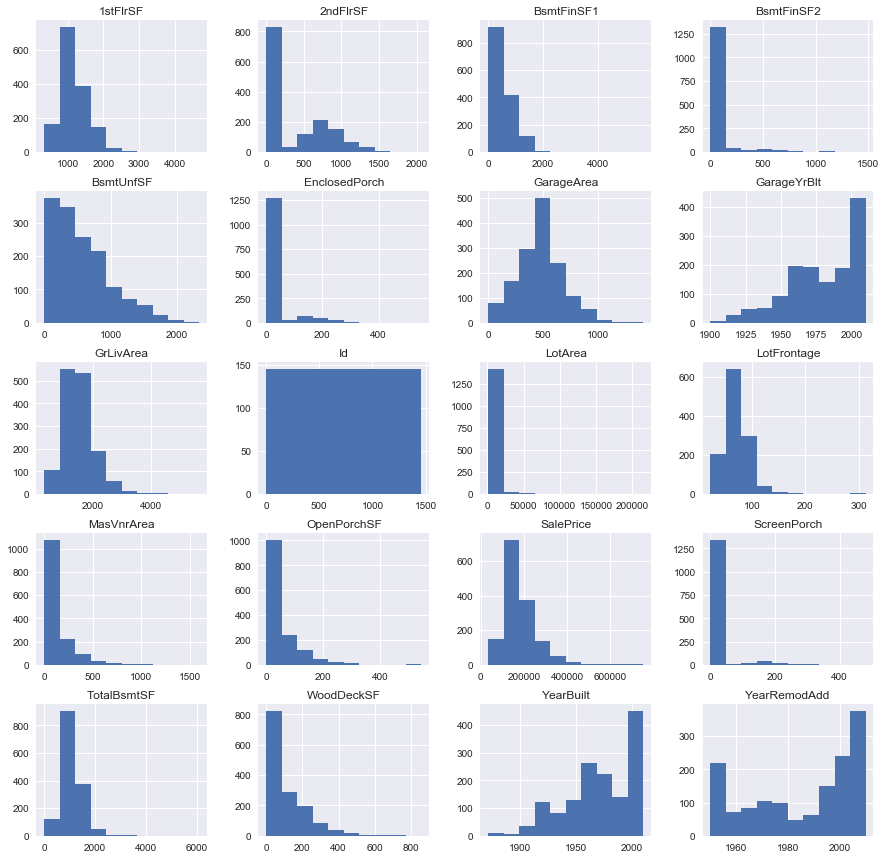

In [20]:
continuous_features = []
for feature in ames.columns:
    if (ames[feature].dtype) != 'object' and len(ames[feature].unique()) > 50:
        continuous_features.append(feature)

        
ames[continuous_features].hist(figsize=(15,15))

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121bb6c88>,
      dtype=object)

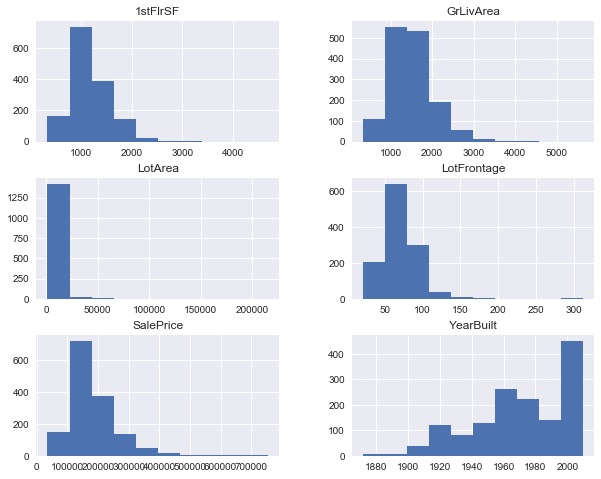

In [34]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = continuous_features.copy()
ames_cont.remove('Id')
ames_cont.remove('WoodDeckSF')
ames_cont.remove('ScreenPorch')
ames_cont.remove('OpenPorchSF')
ames_cont.remove('MasVnrArea')
ames_cont.remove('EnclosedPorch')
ames_cont.remove('BsmtUnfSF')
ames_cont.remove('BsmtFinSF1')
ames_cont.remove('BsmtFinSF2')
ames_cont.remove('2ndFlrSF')
ames_cont.remove('YearRemodAdd')
ames_cont.remove('TotalBsmtSF')
ames_cont.remove('GarageYrBlt')
ames_cont.remove('GarageArea')
ames[ames_cont].hist(figsize=(10,8))

## Perform log transformations for the variables where it makes sense

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1223a4470>,
      dtype=object)

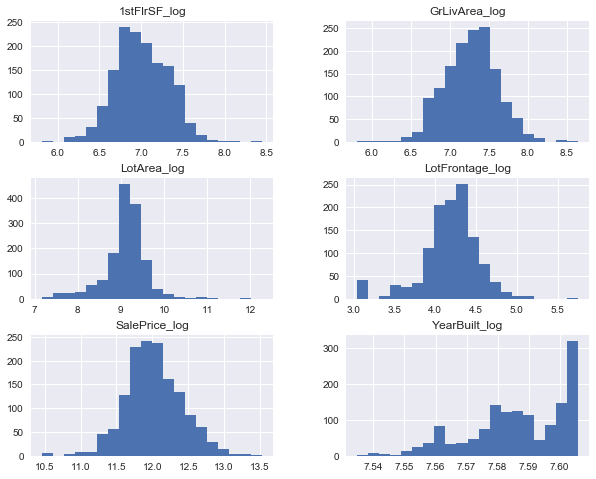

In [37]:
import numpy as np

ames_cont_log = np.log(ames[ames_cont])
ames_cont_log.columns = ['{}_log'.format(column) for column in ames_cont]
ames_cont_log.hist(bins=20, figsize=(10,8))

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [44]:
import sklearn.preprocessing as skprp

features_final=pd.DataFrame(skprp.StandardScaler().fit_transform(ames_cont_log))

In [46]:
features_final.columns = ['{}_log_standardized'.format(column) for column in ames_cont]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a246f4c88>,
      dtype=object)

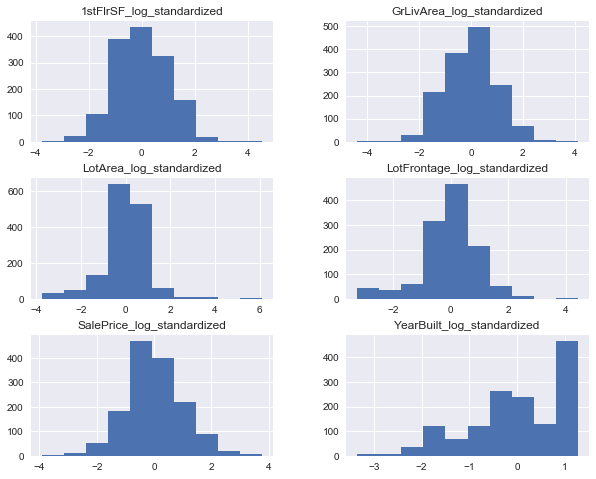

In [48]:
features_final.hist(figsize=(10, 8))

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!